In [103]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

# Dataset

In [104]:
df = pd.read_csv("all_attributes_487_42.csv")

df.index = df['Grid cell']
df.rename(columns={'revised_landuse_11210':'landuse_dis_dense_urban', 
                   'revised_landuse_11220':'landuse_dis_medium_dense_urban', 
                   'revised_landuse_12100':'landuse_industrial_commercial', 
                   'revised_landuse_11100':'landuse_continuous_urban_fabric',
                   'green_area_m2':'landuse_green_area',
                   'city_level':'city_level_road', 
                   'neighborhood_level':'neighborhood_level_road',
                   'camera_surveillance':'camera_surveillance_poi',
                   'housing_Owner':'housing_owner', 
                   'housing_Renter':'housing_renter',
                   'housing_buld_age_1945 and before':'housing_buld_age_1945_before', 
                   'housing_buld_age_1946-1990':'housing_buld_age_1946_1990',
                   'housing_buld_age_1991 and after':'housing_buld_age_1991_after', 
                   'isco_High':'isco_high', 
                   'isco_Medium':'isco_medium',
                   'isco_Low':'isco_low', 
                   'ethnical_EST':'ethnical_est', 
                   'ethnical_RUS':'ethnical_rus', 
                   'age_0-9':'age_0_9', 
                   'age_10-19':'age_10_19',
                   'age_20-29':'age_20_29', 
                   'age_30-39':'age_30_39', 
                   'age_40-49':'age_40_49', 
                   'age_50-59':'age_50_59', 
                   'age_60-69':'age_60_69',
                   'age_70-79':'age_70_79',
                   'age_80-89':'age_80_89', 
                   'age_90+':'age_90_plus', 
                   'X':'x_coordinate', 
                   'Y':'y_coordinate',
                   'numbers_against_public_order':'crimes_against_public_order', 
                   'numbers_violent_crime':'violent_crimes',
                   'numbers_against_property':'crimes_against_property',
                   'crime_incidents':'total_crime_incidents',
                   
                   
                   }, inplace=True)



remove_list = ['id', 'Grid cell', 'Grid cell_count', 'geometry']
df.drop(columns=remove_list, inplace= True)
df.fillna(0, inplace= True)

df.head()

,landuse_green_area,city_level_road,neighborhood_level_road,trail,camera_surveillance_poi,commercial_poi,public_poi,recreation_poi,housing_owner,housing_renter,housing_buld_age_1945_before,housing_buld_age_1946_1990,housing_buld_age_1991_after,housing_small_apartment,housing_large_apartment,housing_standalone_house,housing_auxiliary_house,housing_others,isco_high,isco_medium,isco_low,ethnical_est,ethnical_rus,age_0_9,age_10_19,age_20_29,age_30_39,age_40_49,age_50_59,age_60_69,age_70_79,age_80_89,age_90_plus,landuse_continuous_urban_fabric,landuse_dis_dense_urban,landuse_dis_medium_dense_urban,landuse_industrial_commercial,x_coordinate,y_coordinate,landuse_diversity,crimes_against_public_order,violent_crimes,crimes_against_property,total_crime_incidents
Grid cell,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
500mN6579500E534500,87263.047,293.540,4543.525,1051.469,0.0,0.0,2.0,1.0,48,3,0.0,51.0,0.0,1.0,18.0,79.0,0.0,2.0,11,3,9,44,7,3,7,3,7,4,8,8,6,5,0,0.0,109464.280,79694.801,0.000,534749.5,6579749.5,3,0.0,0.0,0.0,0.0
500mN6579500E535000,26675.069,28.188,3747.517,371.002,0.0,0.0,0.0,0.0,240,22,0.0,258.0,35.0,1.0,10.0,118.0,0.0,6.0,77,34,44,278,11,27,32,33,38,45,38,38,18,20,4,0.0,14387.668,187514.842,0.000,535249.5,6579749.5,3,3.5,0.5,142.5,146.5
500mN6579500E535500,34570.188,1033.767,3472.457,616.484,0.0,3.0,0.0,0.0,297,14,0.0,341.0,27.0,1.0,20.0,70.0,0.0,3.0,48,50,86,339,22,27,40,35,44,45,55,52,45,24,0,0.0,59009.091,113888.838,33783.671,535749.5,6579749.5,4,3.5,0.5,142.5,146.5
500mN6579500E536000,115311.402,0.000,1787.774,1831.268,0.0,0.0,0.0,0.0,53,7,0.0,40.0,25.0,0.0,11.0,49.0,1.0,11.0,15,6,6,58,5,8,6,3,4,9,8,8,12,7,0,0.0,1398.917,143772.389,11208.645,536249.5,6579749.5,4,0.0,0.0,3.0,3.0
500mN6580000E534500,33491.531,98.575,4174.573,153.976,0.0,0.0,0.0,0.0,77,0,0.0,0.0,78.0,11.0,0.0,113.0,0.0,3.0,36,10,5,68,7,3,12,12,4,11,18,13,6,3,0,0.0,205964.815,4315.367,0.000,534749.5,6580249.5,3,0.0,0.0,1.5,1.5


# Pre-processing

In [105]:
hyperparameter_testing = True
normalization = False
standardization = False

In [106]:
# Change the target here
target = "crimes_against_property"

# Four targets for prediction are available:
# 'crimes_against_public_order', 
# 'crimes_against_property',
# 'total_crime_incidents',

In [107]:
target_list = [
    'crimes_against_public_order', 
    'crimes_against_property',
    'total_crime_incidents',
    'violent_crimes',
]

if target in target_list:
    target_list.remove(target)
    df_predictors = df.drop(columns=target_list)

predictors = df_predictors.columns.to_list()
predictors.remove(target)
predictor_x = predictors

# Modeling preparation

In [108]:
from sklearn.model_selection import train_test_split

# Control the random seed
random_state = 2024

# Choose the target variable
y = df[target]
print(y.describe())

# Drop the target variable and the id column
x = df[predictor_x]

# Naming for later plotting use
y_name = y.name
x_columns = x.columns


# Normalization
if normalization is True:
    from sklearn.preprocessing import MinMaxScaler
    min_max_scaler = MinMaxScaler(feature_range=(0, 1))

    # for i in x.columns:
    x = min_max_scaler.fit_transform(x, y)
else:
    x = x.values


# Convert to numpy arrays for sklearn
y = y.values

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state= random_state)

count     487.000000
mean       97.634497
std       250.637283
min         0.000000
25%         3.000000
50%        14.000000
75%        76.000000
max      3046.000000
Name: crimes_against_property, dtype: float64


## Hyperparameter testing


'bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'

In [109]:
# Tuning: max feature methods

from sklearn.ensemble import RandomForestRegressor

ensemble_regs = [
    (
        "RandomForestRegressor, max_features= Sqrt",
        RandomForestRegressor(
            oob_score= True,
            max_features="sqrt",
            random_state=random_state,
            n_jobs = -1,
        ),
    ),
    (
        "RandomForestRegressor, max_features= log2",
        RandomForestRegressor(
            max_features="log2",
            oob_score= True,
            random_state=random_state,
            n_jobs = -1,
        ),
    ),
    (
        "RandomForestRegressor, max_features= Auto",
        RandomForestRegressor(
            max_features= None,
            oob_score= True,
            random_state=random_state,
            n_jobs = -1,
        ),
    ),
]

In [110]:
# K-fold validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits= 10)
scoring = 'r2'

# https://scikit-learn.org/stable/modules/model_evaluation.html

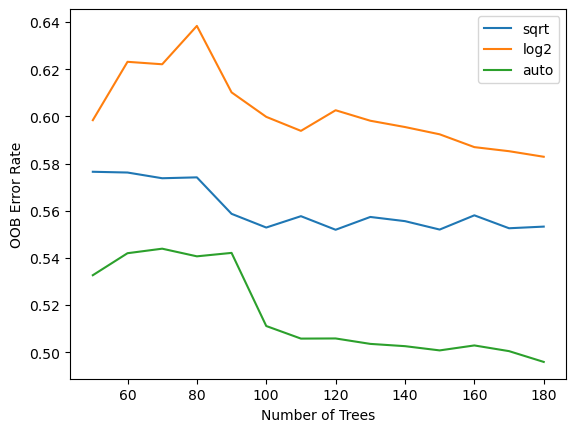

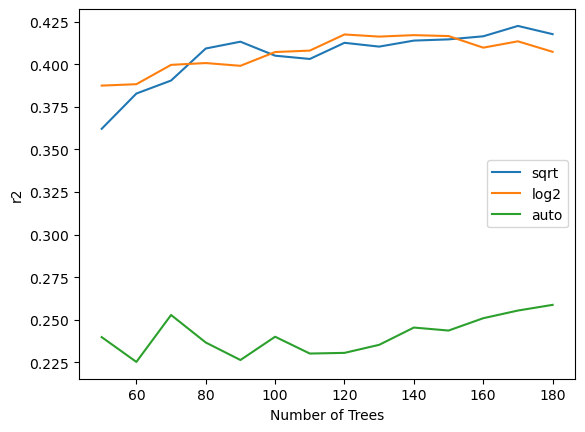

In [111]:
# Tuning: number of trees

if hyperparameter_testing:

    from collections import OrderedDict

    error_list = OrderedDict((label, []) for label, _ in ensemble_regs)
    scoring_list = OrderedDict((label, []) for label, _ in ensemble_regs)
    scoring_test_list = OrderedDict((label, []) for label, _ in ensemble_regs)

    min = 50
    max = 180

    for label, reg in ensemble_regs:
        for i in range(min, max + 1, 10):
            reg.set_params(n_estimators= i)
            reg.fit(x_train, y_train)

            # Record the OOB error
            oob_error = 1 - reg.oob_score_
            error_list[label].append((i, oob_error))
            
            # Record CV
            reg_cv = cross_val_score(reg, x_train, y_train, cv= k_fold, scoring= scoring)
            scoring_list[label].append((i, reg_cv.mean()))
            
            # Record CV with test set
            # reg_cv_test = cross_val_score(reg, x_test, y_test, cv= k_fold, scoring= scoring)
            # scoring_test_list[label].append((i, reg_cv_test.mean()))


    # Collect tuning results
    df_error = pd.concat([pd.DataFrame(error_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'error_sqrt']), pd.DataFrame(error_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'error_log2']), pd.DataFrame(error_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'error_auto'])], axis= 1)
    df_cv = pd.concat([pd.DataFrame(scoring_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'sqrt']), pd.DataFrame(scoring_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'log2']), pd.DataFrame(scoring_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'auto'])], axis= 1)
    # df_cv_test = pd.concat([pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'sqrt']), pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'log2']), pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'auto'])], axis= 1)

    

    plt.plot(df_error['parameter_sqrt'], df_error['error_sqrt'])
    plt.plot(df_error['parameter_log2'], df_error['error_log2'])
    plt.plot(df_error['parameter_auto'], df_error['error_auto'])

    plt.xlabel('Number of Trees')
    plt.ylabel('OOB Error Rate')
    plt.legend(['sqrt', 'log2', 'auto'])
    plt.show()

    plt.plot(df_cv['parameter_sqrt'], df_cv['sqrt'])
    plt.plot(df_cv['parameter_log2'], df_cv['log2'])
    plt.plot(df_cv['parameter_auto'], df_cv['auto'])
    # plt.plot(df_cv_test['parameter_sqrt'], df_cv_test['sqrt'])
    # plt.plot(df_cv_test['parameter_log2'], df_cv_test['log2'])
    # plt.plot(df_cv_test['parameter_auto'], df_cv_test['auto'])
    
    plt.xlabel('Number of Trees')
    plt.ylabel(scoring)
    plt.legend(['sqrt', 'log2', 'auto',]) # 'sqrt_test', 'log2_test', 'auto_test'])
    plt.show()

df_error.to_csv(f'result_3_tree_{target}.csv')
df_cv.to_csv(f'result_3_cv_tree_{target}.csv')


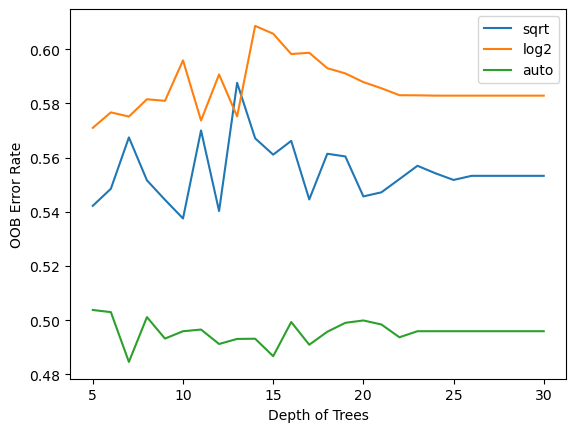

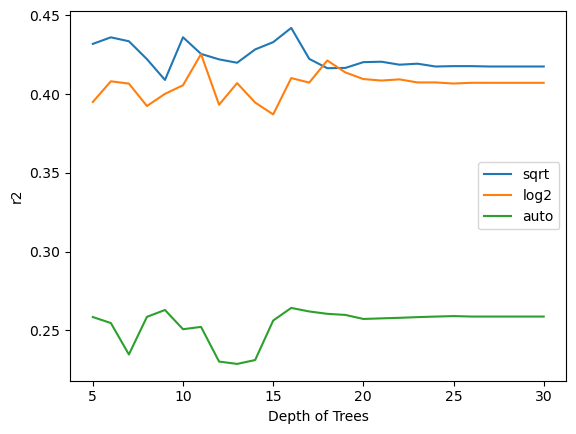

In [112]:
# Tuning: depth of trees

if hyperparameter_testing:

    from collections import OrderedDict

    error_list = OrderedDict((label, []) for label, _ in ensemble_regs)
    scoring_list = OrderedDict((label, []) for label, _ in ensemble_regs)
    # scoring_test_list = OrderedDict((label, []) for label, _ in ensemble_regs)

    min = 5
    max = 30

    for label, reg in ensemble_regs:
        for i in range(min, max + 1, 1):
            reg.set_params(max_depth= i)
            reg.fit(x_train, y_train)

            # Record the OOB error
            oob_error = 1 - reg.oob_score_
            error_list[label].append((i, oob_error))
            
            # Record CV
            reg_cv = cross_val_score(reg, x_train, y_train, cv= k_fold, scoring= scoring)
            scoring_list[label].append((i, reg_cv.mean()))
            
            # Record CV with test set
            # reg_cv_test = cross_val_score(reg, x_test, y_test, cv= k_fold, scoring= scoring)
            # scoring_test_list[label].append((i, reg_cv_test.mean()))


    # Collect tuning results
    df_error = pd.concat([pd.DataFrame(error_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'error_sqrt']), pd.DataFrame(error_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'error_log2']), pd.DataFrame(error_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'error_auto'])], axis= 1)
    df_cv = pd.concat([pd.DataFrame(scoring_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'sqrt']), pd.DataFrame(scoring_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'log2']), pd.DataFrame(scoring_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'auto'])], axis= 1)
    # df_cv_test = pd.concat([pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'sqrt']), pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'log2']), pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'auto'])], axis= 1)


    plt.plot(df_error['parameter_sqrt'], df_error['error_sqrt'])
    plt.plot(df_error['parameter_log2'], df_error['error_log2'])
    plt.plot(df_error['parameter_auto'], df_error['error_auto'])

    plt.xlabel('Depth of Trees')
    plt.ylabel('OOB Error Rate')
    plt.legend(['sqrt', 'log2', 'auto'])
    plt.show()

 
    plt.plot(df_cv['parameter_sqrt'], df_cv['sqrt'])
    # plt.plot(df_cv_test['parameter_sqrt'], df_cv_test['sqrt'])
    plt.plot(df_cv['parameter_log2'], df_cv['log2'])
    # plt.plot(df_cv_test['parameter_log2'], df_cv_test['log2'])
    plt.plot(df_cv['parameter_auto'], df_cv['auto'])
    # plt.plot(df_cv_test['parameter_auto'], df_cv_test['auto'])
    
    plt.xlabel('Depth of Trees')
    plt.ylabel(scoring)
    plt.legend(['sqrt', 'log2', 'auto',])# 'sqrt_test', 'log2_test', 'auto_test'])
    
df_error.to_csv(f'result_3_depth_{target}.csv')
df_cv.to_csv(f'result_3_cv_depth_{target}.csv')


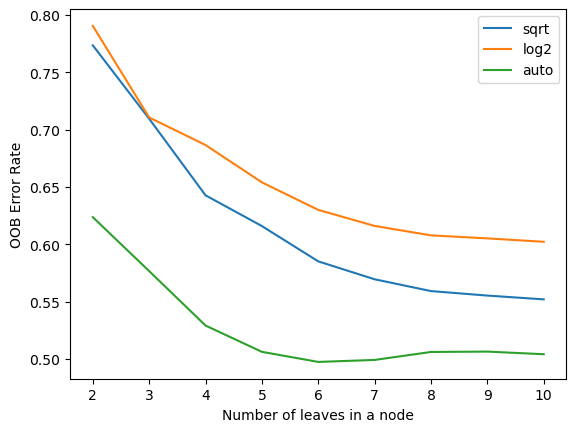

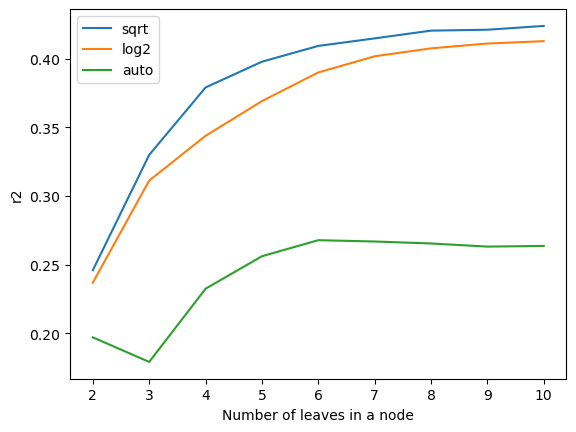

In [113]:
# # Tuning: Max leaf nodes

if hyperparameter_testing:

    from collections import OrderedDict

    error_list = OrderedDict((label, []) for label, _ in ensemble_regs)
    scoring_list = OrderedDict((label, []) for label, _ in ensemble_regs)
    # scoring_test_list = OrderedDict((label, []) for label, _ in ensemble_regs)

    min = 2
    max = 10

    for label, reg in ensemble_regs:
        for i in range(min, max + 1, 1):
            reg.set_params(max_leaf_nodes= i)
            reg.fit(x_train, y_train)

            # Record the OOB error 
            oob_error = 1 - reg.oob_score_
            error_list[label].append((i, oob_error))
            
            # Record CV
            reg_cv = cross_val_score(reg, x_train, y_train, cv= k_fold, scoring= scoring)
            scoring_list[label].append((i, reg_cv.mean()))
            
            # Record CV with test set
            # reg_cv_test = cross_val_score(reg, x_test, y_test, cv= k_fold, scoring= scoring)
            # scoring_test_list[label].append((i, reg_cv_test.mean()))


    # Collect tuning results
    df_error = pd.concat([pd.DataFrame(error_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'error_sqrt']), pd.DataFrame(error_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'error_log2']), pd.DataFrame(error_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'error_auto'])], axis= 1)
    df_cv = pd.concat([pd.DataFrame(scoring_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'sqrt']), pd.DataFrame(scoring_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'log2']), pd.DataFrame(scoring_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'auto'])], axis= 1)
    # df_cv_test = pd.concat([pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'sqrt']), pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'log2']), pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'auto'])], axis= 1)


    plt.plot(df_error['parameter_sqrt'], df_error['error_sqrt'])
    plt.plot(df_error['parameter_log2'], df_error['error_log2'])
    plt.plot(df_error['parameter_auto'], df_error['error_auto'])

    plt.xlabel('Number of leaves in a node')
    plt.ylabel('OOB Error Rate')
    plt.legend(['sqrt', 'log2', 'auto'])
    plt.show()


    plt.plot(df_cv['parameter_sqrt'], df_cv['sqrt'])
    # plt.plot(df_cv_test['parameter_sqrt'], df_cv_test['sqrt'])
    plt.plot(df_cv['parameter_log2'], df_cv['log2'])
    # plt.plot(df_cv_test['parameter_log2'], df_cv_test['log2'])
    plt.plot(df_cv['parameter_auto'], df_cv['auto'])
    # plt.plot(df_cv_test['parameter_auto'], df_cv_test['auto'])
    
    plt.xlabel('Number of leaves in a node')
    plt.ylabel(scoring)
    plt.legend(['sqrt', 'log2', 'auto',])# 'sqrt_test', 'log2_test', 'auto_test'])
    
df_error.to_csv(f'result_3_max_leaf_{target}.csv')
df_cv.to_csv(f'result_3_cv_max_leaf_{target}.csv')

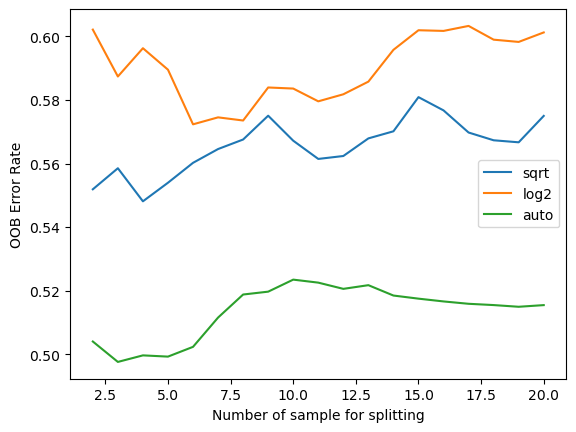

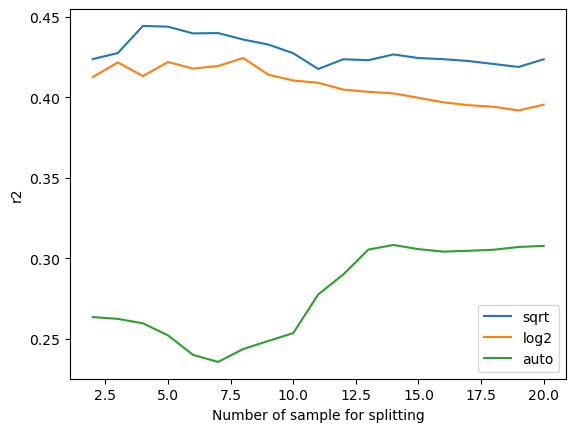

In [114]:
# Tuning: min_samples_split

if hyperparameter_testing:

    from collections import OrderedDict

    error_sample = OrderedDict((label, []) for label, _ in ensemble_regs)
    scoring_sample = OrderedDict((label, []) for label, _ in ensemble_regs)
    # scoring_sample_test = OrderedDict((label, []) for label, _ in ensemble_regs)

    min_sample = 2
    max_sample = 20

    for label, reg in ensemble_regs:
        for i in range(min_sample, max_sample + 1, 1):
            reg.set_params(min_samples_split= i)
            reg.fit(x_train, y_train)

            # Record the OOB error
            oob_error = 1 - reg.oob_score_
            error_sample[label].append((i, oob_error))
            
            # Record CV
            reg_cv = cross_val_score(reg, x_train, y_train, cv= k_fold, scoring= scoring)
            scoring_sample[label].append((i, reg_cv.mean()))
            
            # Record CV with test set
            # reg_cv_test = cross_val_score(reg, x_test, y_test, cv= k_fold, scoring= scoring)
            # scoring_sample_test[label].append((i, reg_cv_test.mean()))


    # Collect tuning results
    df_sample_error = pd.concat([pd.DataFrame(error_sample['RandomForestRegressor, max_features= Sqrt'], columns=['sample_sqrt', 'error_sqrt']), pd.DataFrame(error_sample['RandomForestRegressor, max_features= log2'], columns=['sample_log2', 'error_log2']), pd.DataFrame(error_sample['RandomForestRegressor, max_features= Auto'], columns= ['sample_auto', 'error_auto'])], axis= 1)
    df_sample_cv = pd.concat([pd.DataFrame(scoring_sample['RandomForestRegressor, max_features= Sqrt'], columns=['sample_sqrt', 'sqrt']), pd.DataFrame(scoring_sample['RandomForestRegressor, max_features= log2'], columns=['sample_log2', 'log2']), pd.DataFrame(scoring_sample['RandomForestRegressor, max_features= Auto'], columns= ['sample_auto', 'auto'])], axis= 1)
    # df_sample_cv_test = pd.concat([pd.DataFrame(scoring_sample_test['RandomForestRegressor, max_features= Sqrt'], columns=['sample_sqrt', 'sqrt']), pd.DataFrame(scoring_sample_test['RandomForestRegressor, max_features= log2'], columns=['sample_log2', 'log2']), pd.DataFrame(scoring_sample_test['RandomForestRegressor, max_features= Auto'], columns= ['sample_auto', 'auto'])], axis= 1)


    plt.plot(df_sample_error['sample_sqrt'], df_sample_error['error_sqrt'])
    plt.plot(df_sample_error['sample_log2'], df_sample_error['error_log2'])
    plt.plot(df_sample_error['sample_auto'], df_sample_error['error_auto'])

    plt.xlabel('Number of sample for splitting')
    plt.ylabel('OOB Error Rate')
    plt.legend(['sqrt', 'log2', 'auto'])
    plt.show()

    plt.plot(df_sample_cv['sample_sqrt'], df_sample_cv['sqrt'])
    # plt.plot(df_sample_cv_test['sample_sqrt'], df_sample_cv_test['sqrt'])
    plt.plot(df_sample_cv['sample_log2'], df_sample_cv['log2'])
    # plt.plot(df_sample_cv_test['sample_log2'], df_sample_cv_test['log2'])
    plt.plot(df_sample_cv['sample_auto'], df_sample_cv['auto'])
    # plt.plot(df_sample_cv_test['sample_auto'], df_sample_cv_test['auto'])
    
    plt.xlabel('Number of sample for splitting')
    plt.ylabel(scoring)
    plt.legend(['sqrt', 'log2', 'auto',]) # 'sqrt_test', 'log2_test', 'auto_test'])
    plt.show()
    
df_error.to_csv(f'result_3_min_split_{target}.csv')
df_cv.to_csv(f'result_3_cv_min_split_{target}.csv')

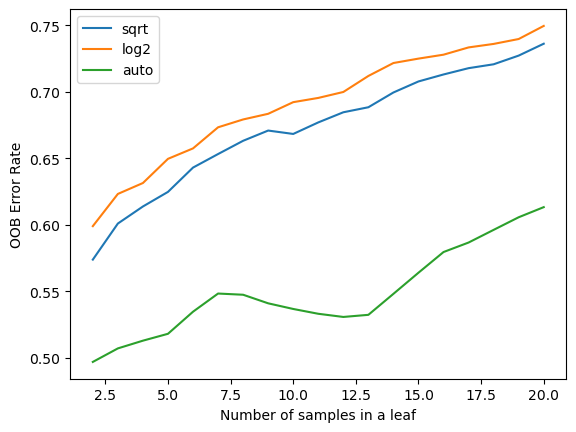

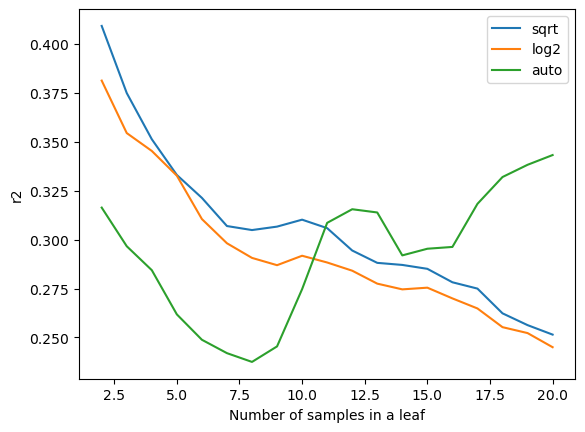

In [115]:
# Tuning: min_samples_leaf

if hyperparameter_testing:

    from collections import OrderedDict

    error_list = OrderedDict((label, []) for label, _ in ensemble_regs)
    scoring_list = OrderedDict((label, []) for label, _ in ensemble_regs)
    # scoring_test_list = OrderedDict((label, []) for label, _ in ensemble_regs)

    min = 2
    max = 20

    for label, reg in ensemble_regs:
        for i in range(min, max + 1, 1):
            reg.set_params(min_samples_leaf= i)
            reg.fit(x_train, y_train)

            # Record the OOB error
            oob_error = 1 - reg.oob_score_
            error_list[label].append((i, oob_error))
            
            # Record CV
            reg_cv = cross_val_score(reg, x_train, y_train, cv= k_fold, scoring= scoring)
            scoring_list[label].append((i, reg_cv.mean()))
            
            # Record CV with test set
            # reg_cv_test = cross_val_score(reg, x_test, y_test, cv= k_fold, scoring= scoring)
            # scoring_test_list[label].append((i, reg_cv_test.mean()))


    # Collect tuning results
    df_error = pd.concat([pd.DataFrame(error_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'error_sqrt']), pd.DataFrame(error_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'error_log2']), pd.DataFrame(error_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'error_auto'])], axis= 1)
    df_cv = pd.concat([pd.DataFrame(scoring_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'sqrt']), pd.DataFrame(scoring_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'log2']), pd.DataFrame(scoring_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'auto'])], axis= 1)
    # df_cv_test = pd.concat([pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'sqrt']), pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'log2']), pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'auto'])], axis= 1)


    plt.plot(df_error['parameter_sqrt'], df_error['error_sqrt'])
    plt.plot(df_error['parameter_log2'], df_error['error_log2'])
    plt.plot(df_error['parameter_auto'], df_error['error_auto'])

    plt.xlabel('Number of samples in a leaf')
    plt.ylabel('OOB Error Rate')
    plt.legend(['sqrt', 'log2', 'auto'])
    plt.show()


    plt.plot(df_cv['parameter_sqrt'], df_cv['sqrt'])
    # plt.plot(df_cv_test['parameter_sqrt'], df_cv_test['sqrt'])
    plt.plot(df_cv['parameter_log2'], df_cv['log2'])
    # plt.plot(df_cv_test['parameter_log2'], df_cv_test['log2'])
    plt.plot(df_cv['parameter_auto'], df_cv['auto'])
    # plt.plot(df_cv_test['parameter_auto'], df_cv_test['auto'])
    
    plt.xlabel('Number of samples in a leaf')
    plt.ylabel(scoring)
    plt.legend(['sqrt', 'log2', 'auto',]) # 'sqrt_test', 'log2_test', 'auto_test'])
    plt.show()
    
df_error.to_csv(f'result_3_min_leaf_{target}.csv')
df_cv.to_csv(f'result_3_cv_min_leaf_{target}.csv')

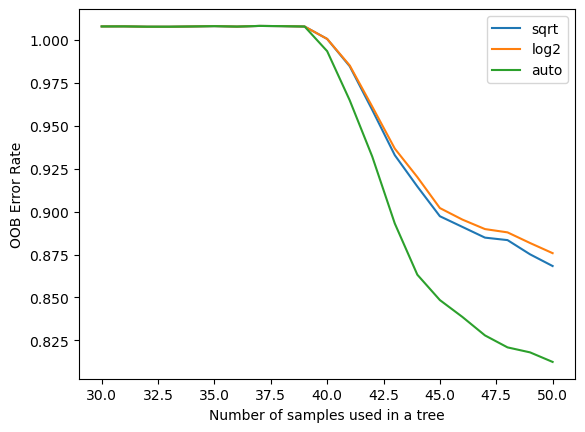

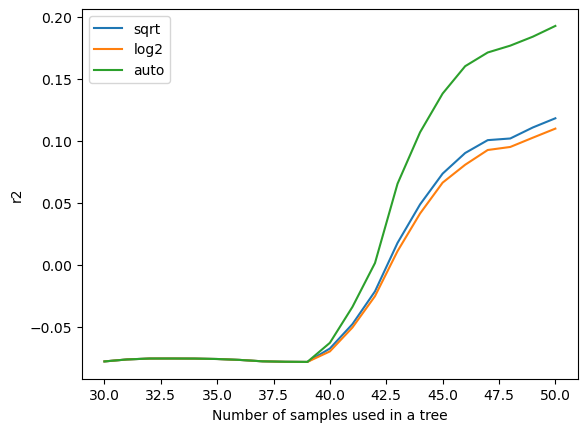

In [116]:
# Tuning: max_samples

if hyperparameter_testing:

    from collections import OrderedDict

    error_list = OrderedDict((label, []) for label, _ in ensemble_regs)
    scoring_list = OrderedDict((label, []) for label, _ in ensemble_regs)
    # scoring_test_list = OrderedDict((label, []) for label, _ in ensemble_regs)

    min = 30
    max = 50

    for label, reg in ensemble_regs:
        for i in range(min, max + 1, 1):
            reg.set_params(max_samples= i)
            reg.fit(x_train, y_train)

            # Record the OOB error
            oob_error = 1 - reg.oob_score_
            error_list[label].append((i, oob_error))
            
            # Record CV
            reg_cv = cross_val_score(reg, x_train, y_train, cv= k_fold, scoring= scoring)
            scoring_list[label].append((i, reg_cv.mean()))
            
            # Record CV with test set
            # reg_cv_test = cross_val_score(reg, x_test, y_test, cv= k_fold, scoring= scoring)
            # scoring_test_list[label].append((i, reg_cv_test.mean()))


    # Collect tuning results
    df_error = pd.concat([pd.DataFrame(error_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'error_sqrt']), pd.DataFrame(error_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'error_log2']), pd.DataFrame(error_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'error_auto'])], axis= 1)
    df_cv = pd.concat([pd.DataFrame(scoring_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'sqrt']), pd.DataFrame(scoring_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'log2']), pd.DataFrame(scoring_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'auto'])], axis= 1)
    # df_cv_test = pd.concat([pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= Sqrt'], columns=['parameter_sqrt', 'sqrt']), pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= log2'], columns=['parameter_log2', 'log2']), pd.DataFrame(scoring_test_list['RandomForestRegressor, max_features= Auto'], columns= ['parameter_auto', 'auto'])], axis= 1)


    plt.plot(df_error['parameter_sqrt'], df_error['error_sqrt'])
    plt.plot(df_error['parameter_log2'], df_error['error_log2'])
    plt.plot(df_error['parameter_auto'], df_error['error_auto'])

    plt.xlabel('Number of samples used in a tree')
    plt.ylabel('OOB Error Rate')
    plt.legend(['sqrt', 'log2', 'auto'])
    plt.show()


    plt.plot(df_cv['parameter_sqrt'], df_cv['sqrt'])
    # plt.plot(df_cv_test['parameter_sqrt'], df_cv_test['sqrt'])
    plt.plot(df_cv['parameter_log2'], df_cv['log2'])
    # plt.plot(df_cv_test['parameter_log2'], df_cv_test['log2'])
    plt.plot(df_cv['parameter_auto'], df_cv['auto'])
    # plt.plot(df_cv_test['parameter_auto'], df_cv_test['auto'])
    
    plt.xlabel('Number of samples used in a tree')
    plt.ylabel(scoring)
    plt.legend(['sqrt', 'log2', 'auto',]) # 'sqrt_test', 'log2_test', 'auto_test'])
    plt.show()
    
df_error.to_csv(f'result_3_max_sample_{target}.csv')
df_cv.to_csv(f'result_3_cv_max_sample_{target}.csv')

# Modeling

In [117]:
# Change the tree number, depth, and maximum feature method here
tree_number = 110
tree_depth = 12
max_feature_method = None
# 'sqrt', 'log2', and None for auto

max_leaf_nodes = 4
min_samples_split = 13
min_samples_leaf = 18
# max_samples = 50



from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

f_regmodel = RandomForestRegressor(
    n_estimators= tree_number,  # Trees
    random_state= random_state, 
    criterion='squared_error', 
    max_depth= tree_depth, # Depth
    max_features= max_feature_method,
    oob_score= True,
    max_leaf_nodes = max_leaf_nodes,
    min_samples_split = min_samples_split,
    min_samples_leaf = min_samples_leaf,
    # max_samples= max_samples,
    )

# standardlize
if standardization is True:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

reg = f_regmodel.fit(x_train, y_train)

predict_list = list(reg.predict(x_train))
y_train_list = list(y_train)

predict_test_list = list(reg.predict(x_test))
y_test_list = list(y_test)


print('Training data validation:\nR2: {} \nRMSE: {} \nMAE: {}\n'.format(r2_score(y_train_list, predict_list), mean_squared_error(y_train_list, predict_list, squared=False), mean_absolute_error(y_train_list, predict_list)))
print('Test data validation:\nR2: {} \nRMSE: {} \nMAE: {}'.format(r2_score(y_test_list, predict_test_list), mean_squared_error(y_test_list, predict_test_list, squared=False), mean_absolute_error(y_test_list, predict_test_list)))

Training data validation:
R2: 0.4747515847889481 
RMSE: 146.92376321507237 
MAE: 63.792317678817156

Test data validation:
R2: 0.2757172991902369 
RMSE: 246.72106881452305 
MAE: 85.08100896847411


/Users/ansel/micromamba/envs/geopython2023/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ansel/micromamba/envs/geopython2023/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Results

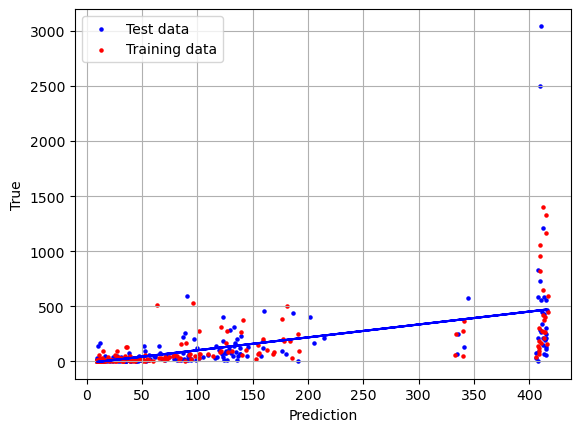

In [118]:
import numpy as np
plt.scatter(predict_test_list, y_test_list, s= 5, c= 'blue')
plt.scatter(predict_list, y_train_list, s= 5, c= 'red')

plt.xlabel('Prediction')
plt.ylabel('True')
plt.grid()
plt.legend(['Test data', 'Training data'])

m, b = np.polyfit(predict_test_list, y_test_list, 1)
plt.plot(predict_test_list, m*np.array(predict_test_list) + b, color= 'blue')


plt.show()

## Residuals

In [119]:
import geopandas as gpd
gdf = gpd.read_file("pre_attributes_487_42.geojson")
# gdf.plot(column= target, legend= True, cmap= 'coolwarm', legend_kwds= {'label': target})

In [120]:
# Prepare all data without splitting training and testing
y_val = df[target]
x_val = df[predictor_x]

# Naming for later plotting use
y_val_name = y_val.name
x_val_columns = x_val.columns

# Normalization (based on the modeling setting)
if normalization is True:
    from sklearn.preprocessing import MinMaxScaler
    min_max_scaler = MinMaxScaler(feature_range=(0, 1))
    x_val = min_max_scaler.fit_transform(x_val.values, y_val.values)
else:
    x_val = x_val.values



<Axes: >

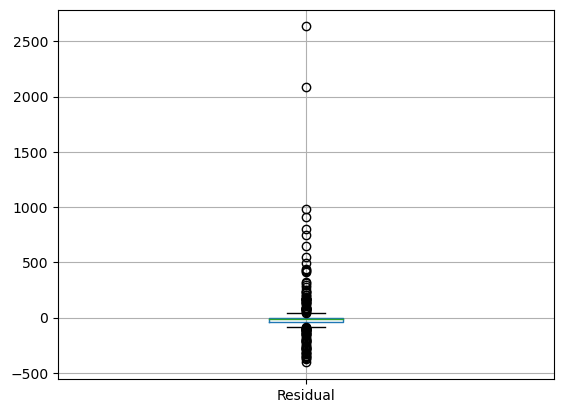

In [121]:
# Calculate the residual

# Predict the validation data
y_val_predict_list = list(reg.predict(x_val))
y_val_list = list(y_val.values)

# print('SAC Validation:\nR2: {} \nRMSE: {} \nMAE: {}\n'.format(r2_score(y_val_list, x_val_predict_list), mean_squared_error(y_val_list, x_val_predict_list, squared=False), mean_absolute_error(y_val_list, x_val_predict_list)))

y_val_residual = y_val.values - y_val_predict_list
y_val_residual = pd.DataFrame(y_val_residual, columns= ['Residual'], index= y_val.index)

y_val_residual.boxplot()

<Axes: ylabel='Frequency'>

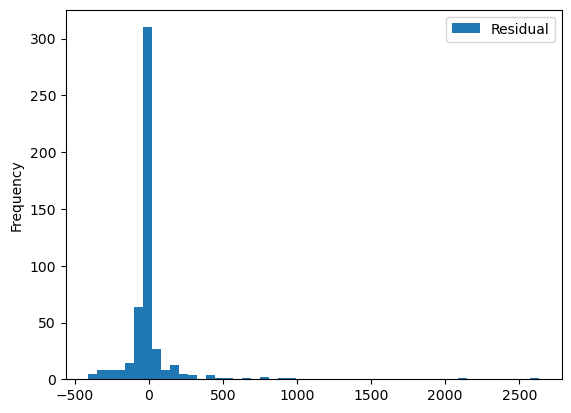

In [122]:
y_val_residual.plot.hist(bins= 50)

In [123]:
# Join gdf and residual by grid cell
gdf = gdf[['Grid cell', 'geometry', 'X', 'Y']].join(y_val_residual, on= 'Grid cell')
gdf.head()

,Grid cell,geometry,X,Y,Residual
0,500mN6579500E534500,"POLYGON ((534500.000 6579500.000, 534500.000 6...",534749.5,6579749.5,-39.097484
1,500mN6579500E535000,"POLYGON ((535000.000 6579500.000, 535000.000 6...",535249.5,6579749.5,132.196562
2,500mN6579500E535500,"POLYGON ((535500.000 6579500.000, 535500.000 6...",535749.5,6579749.5,77.310578
3,500mN6579500E536000,"POLYGON ((536000.000 6579500.000, 536000.000 6...",536249.5,6579749.5,-7.199928
4,500mN6580000E534500,"POLYGON ((534500.000 6580000.000, 534500.000 6...",534749.5,6580249.5,-8.434619


In [124]:
# Save the residual

y_val_residual.to_csv(f'residual_3_{target}_{tree_number}_{tree_depth}_{max_feature_method}_{max_leaf_nodes}.csv')
gdf.to_file(f"residual_3_{target}_{tree_number}_{tree_depth}_{max_feature_method}_{max_leaf_nodes}.geojson", driver= 'GeoJSON')

/Users/ansel/micromamba/envs/geopython2023/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<Axes: >

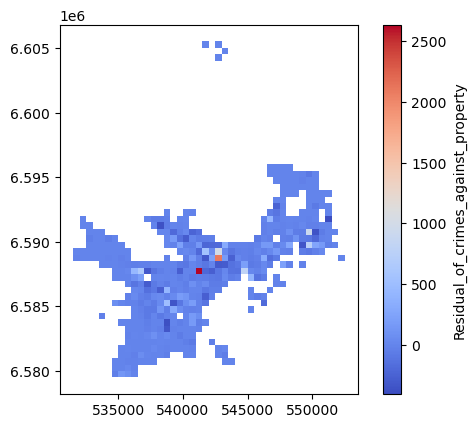

In [125]:
gdf.plot(column= 'Residual', legend= True, cmap= 'coolwarm', legend_kwds= {'label': f'Residual_of_{target}'})

In [126]:
# Calculate the Moran's I
import libpysal
from esda.moran import Moran

xy = gdf[['X', 'Y']].values
w = libpysal.weights.DistanceBand.from_array(xy, threshold= 500, binary= False)
# w = libpysal.weights.KNN.from_dataframe(gdf, k= 8)
y = gdf['Residual']

moran = Moran(y, w)
moran.I


('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 166, ' is an island (no neighbors)')
('WARNING: ', 261, ' is an island (no neighbors)')
('WARNING: ', 287, ' is an island (no neighbors)')
('WARNING: ', 420, ' is an island (no neighbors)')
('WARNING: ', 484, ' is an island (no neighbors)')
('WARNING: ', 485, ' is an island (no neighbors)')
('WARNING: ', 486, ' is an island (no neighbors)')


/Users/ansel/micromamba/envs/geopython2023/lib/python3.10/site-packages/scipy/sparse/_data.py:132: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ansel/micromamba/envs/geopython2023/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 15 disconnected components.
 There are 10 islands with ids: 57, 95, 117, 166, 261, 287, 420, 484, 485, 486.
  warnings.warn(message)


0.028379996715636815

In [127]:
moran.p_sim


0.145

In [128]:
moran.z_sim

0.7629380506254227

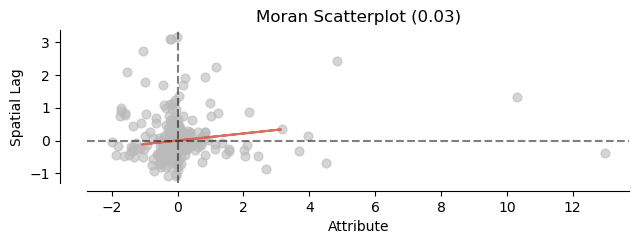

In [129]:
# Make a Moran scatter plot
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal= True)
plt.show()

## Important Factors

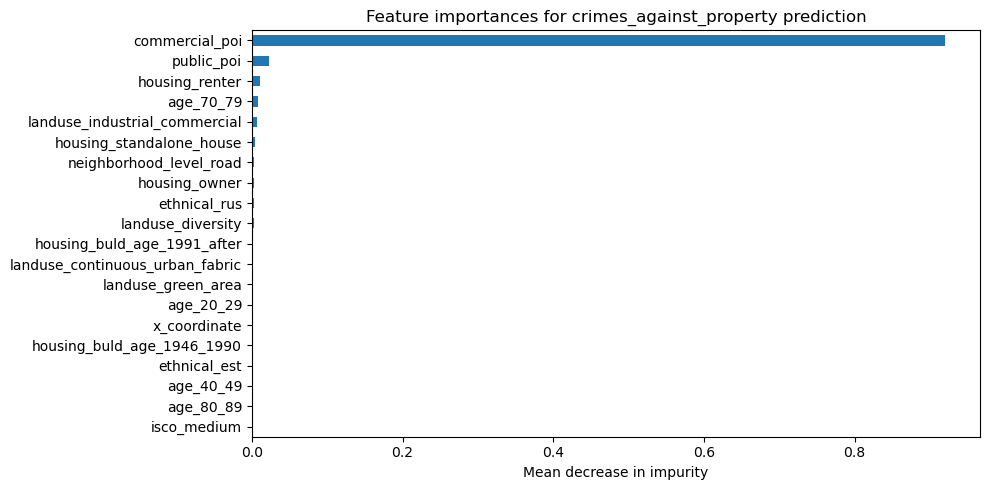

In [130]:
import numpy as np

importances = reg.feature_importances_
forest_importances = pd.Series(importances, index=x_columns).sort_values(ascending=True).tail(20)


fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
forest_importances.plot.barh(ax = ax)
ax.set_title("Feature importances for {} prediction".format(y_name))
ax.set_xlabel("Mean decrease in impurity")

fig.tight_layout()

In [131]:
df_forest_importance = pd.DataFrame(forest_importances)
df_forest_importance['Factor'] = df_forest_importance.index
df_forest_importance.columns = ['Score', 'Factor']
df_forest_importance = df_forest_importance.sort_values(by= 'Score', ascending= False)

# df_forest_importance.to_csv(f'result_importance_{target}_{tree_number}_{tree_depth}_{max_feature_method}.csv', index= False)


## SHAP

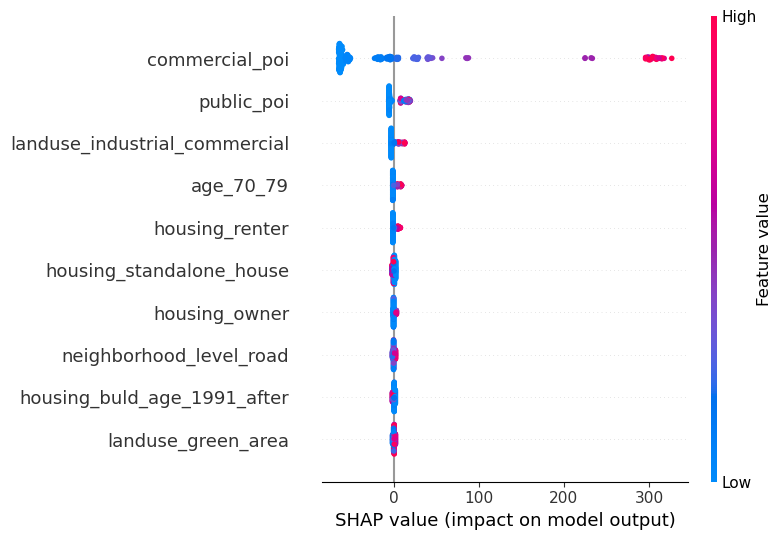

In [132]:
import shap
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, feature_names=x_columns, max_display= 10, plot_type= 'dot')


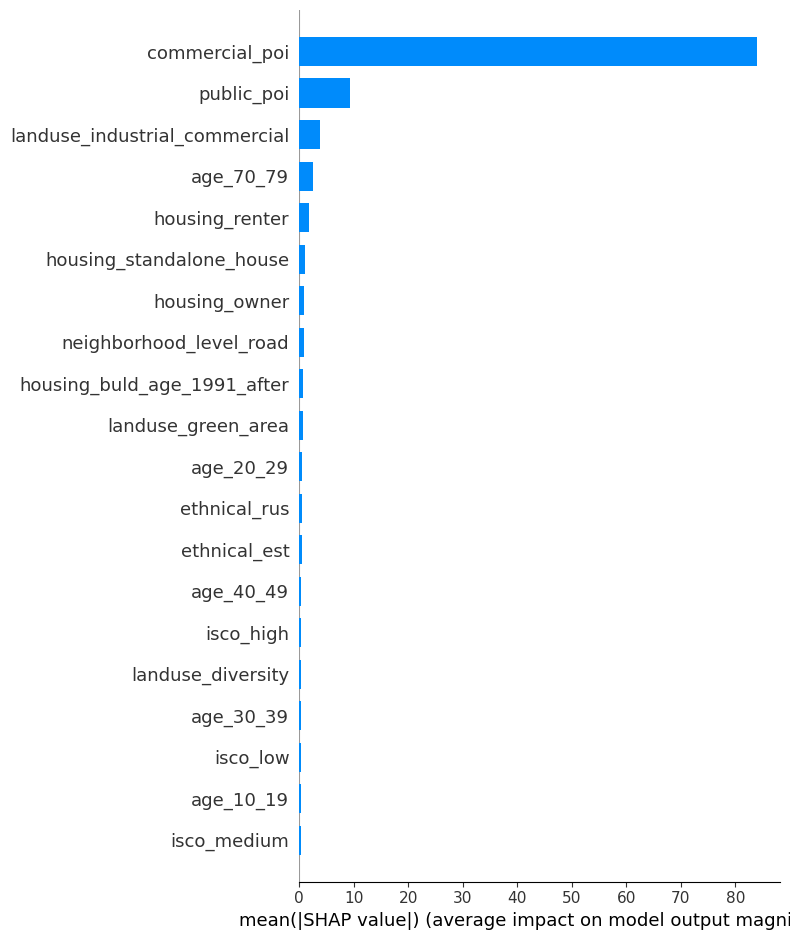

In [133]:
shap.summary_plot(shap_values, x_test, feature_names=x_columns, plot_type="bar")


In [ ]:
# Force plot for one samples
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test[0,:], feature_names=x_columns)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, x_test, plot_cmap="DrDb", feature_names=x_columns)


## PDP

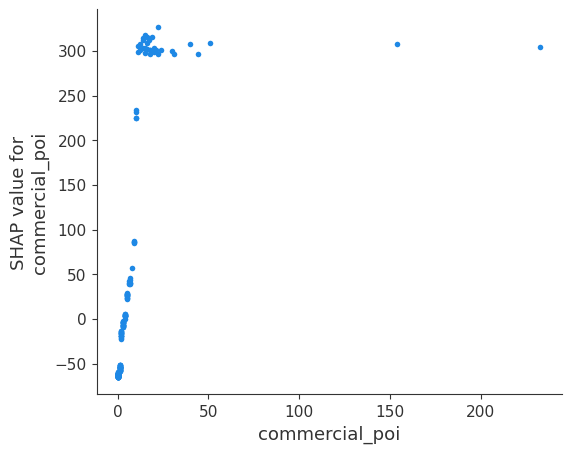

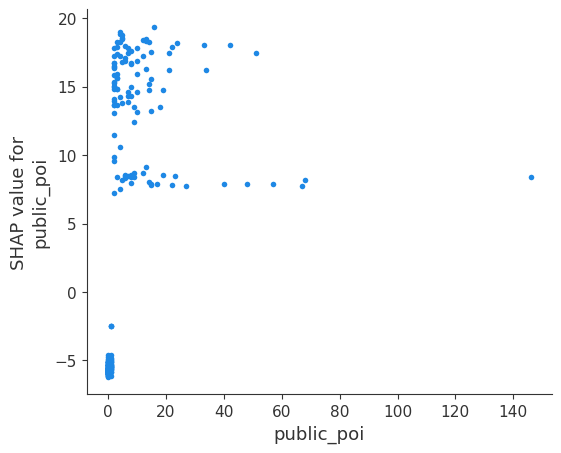

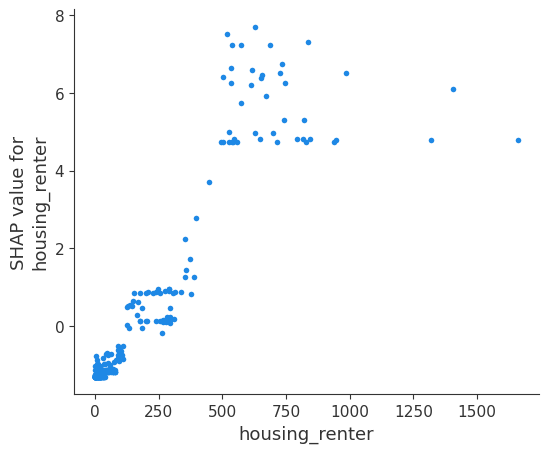

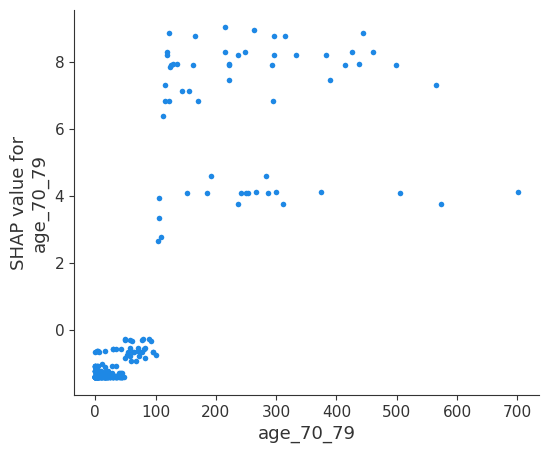

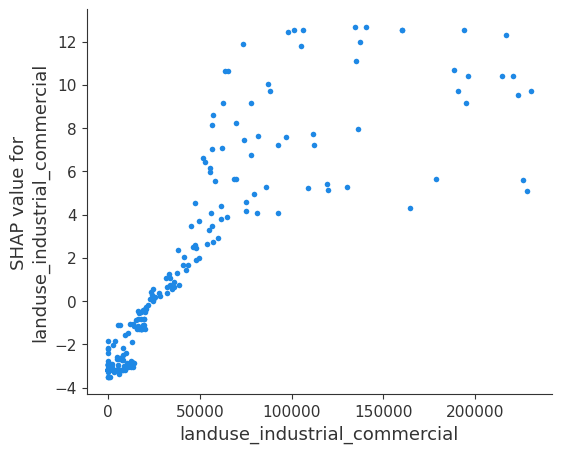

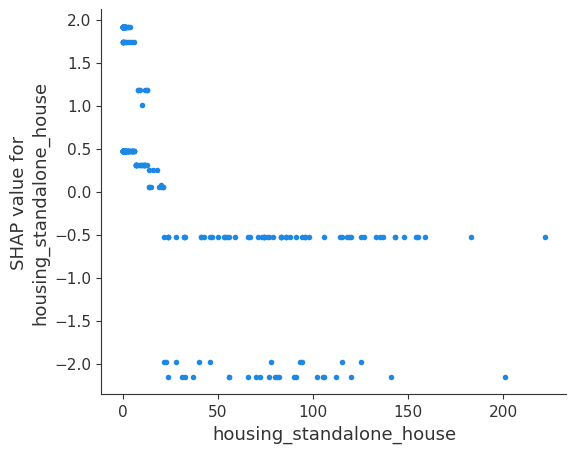

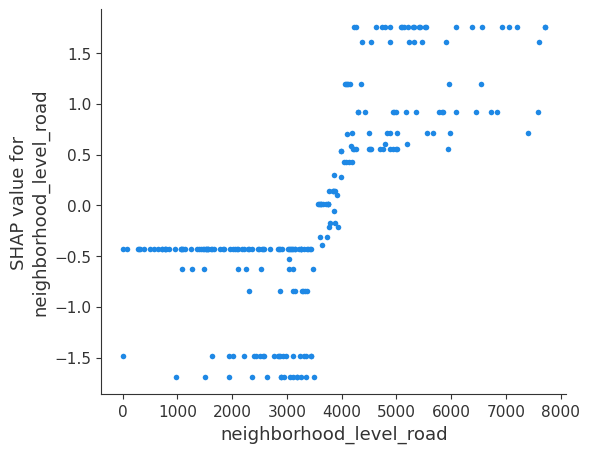

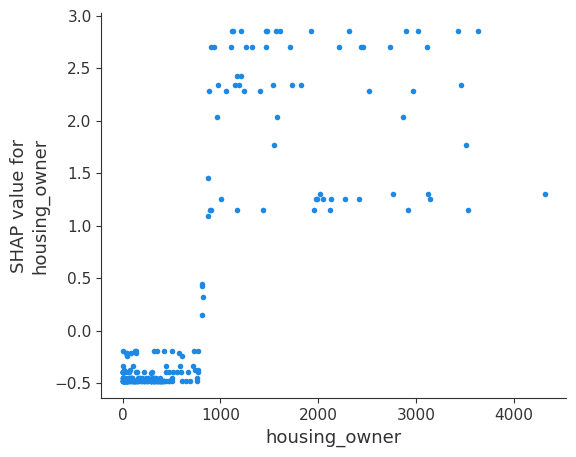

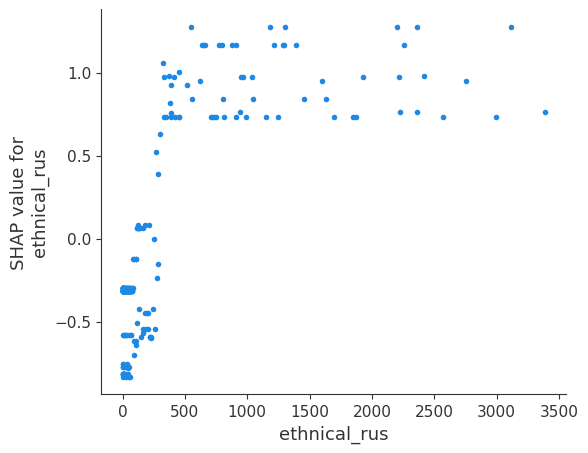

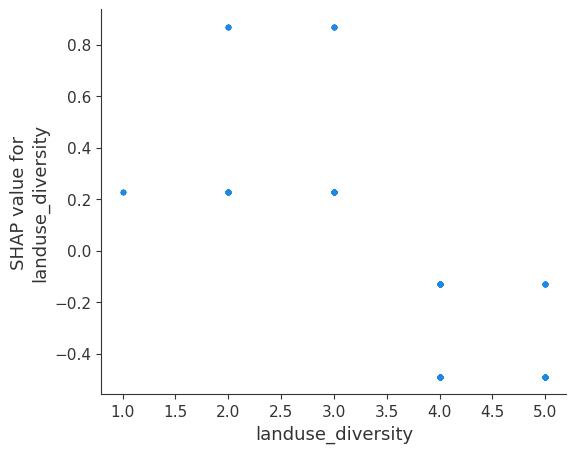

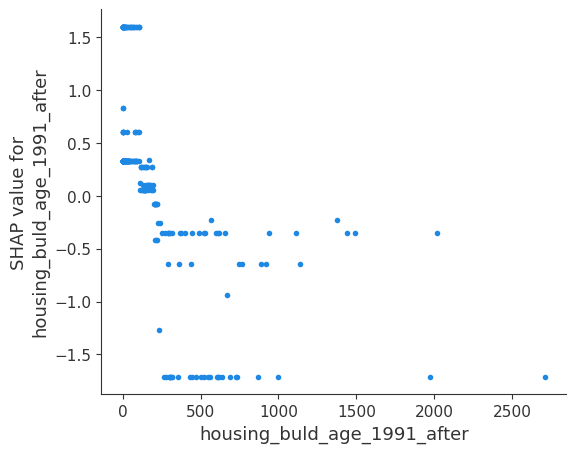

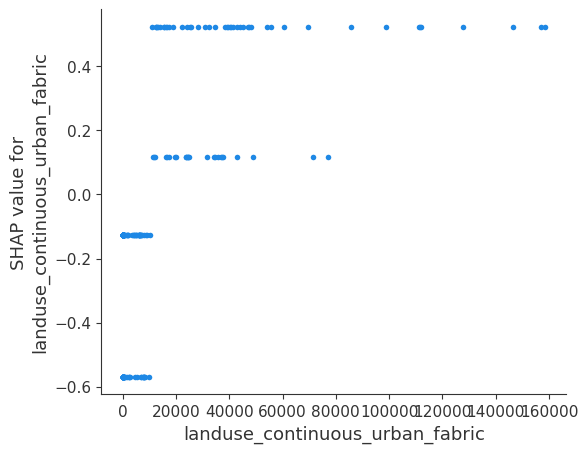

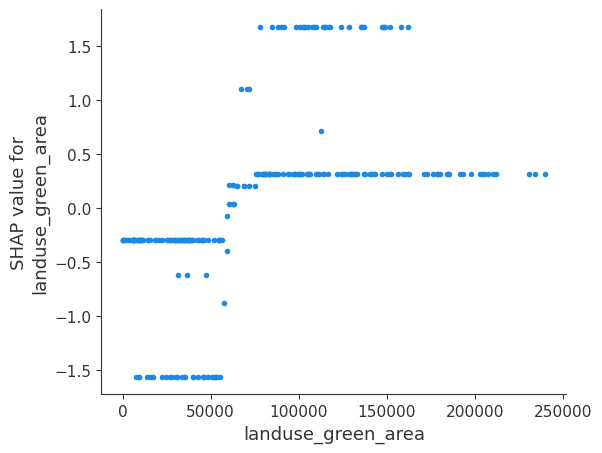

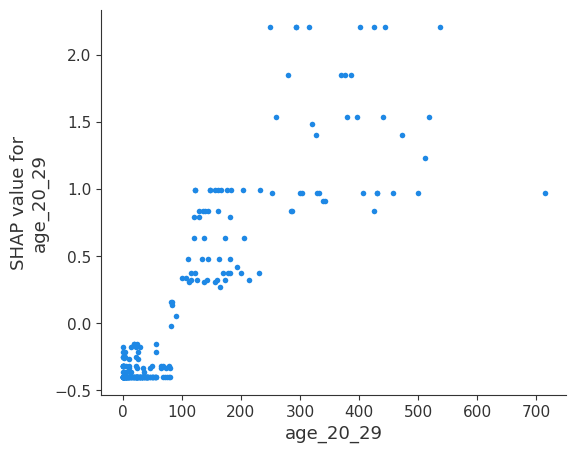

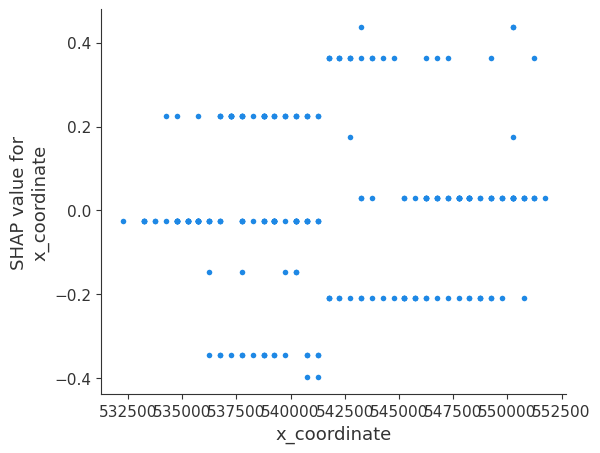

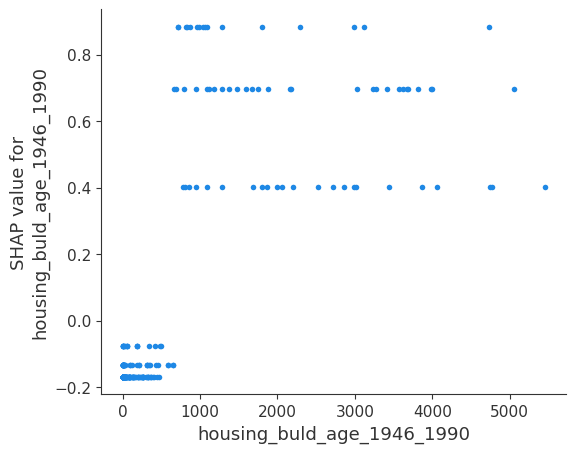

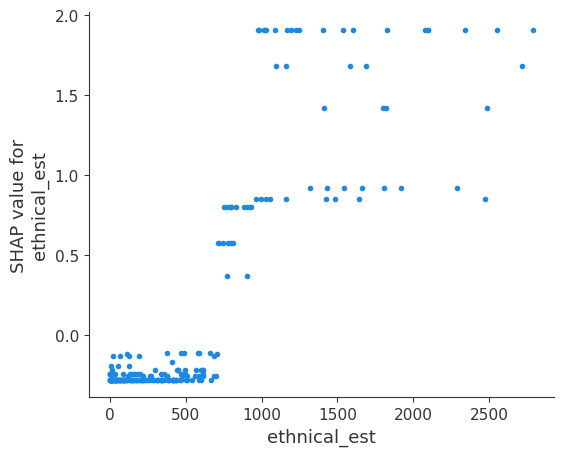

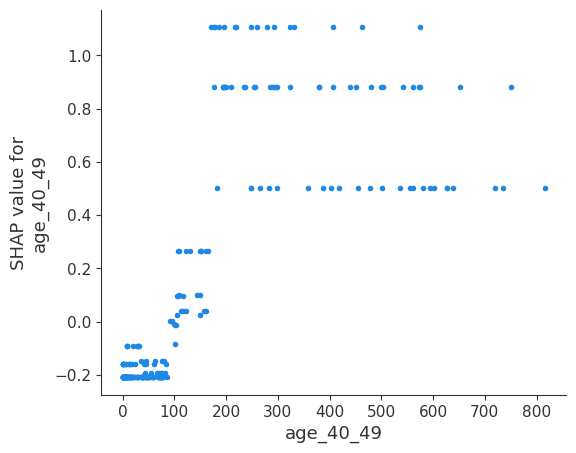

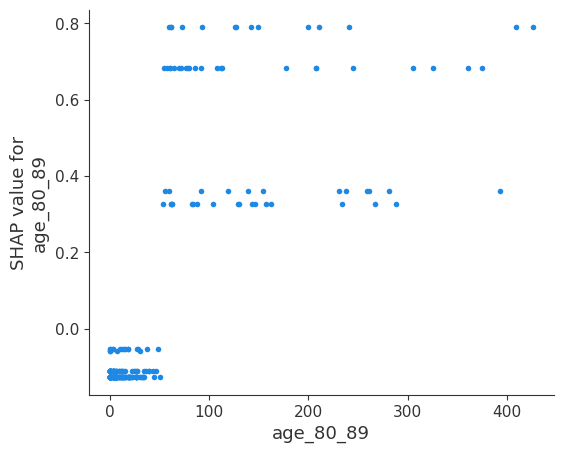

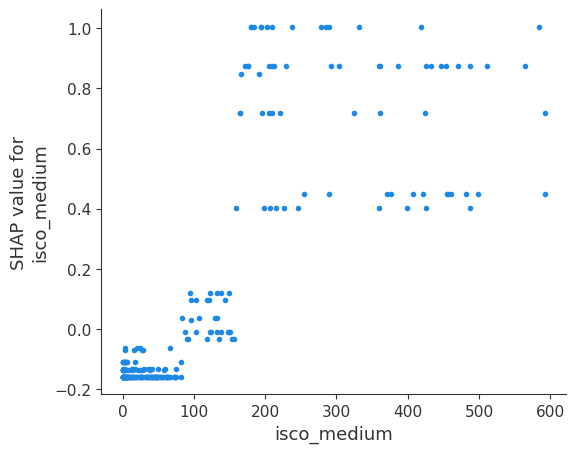

In [135]:
for i in df_forest_importance.index:
    shap.dependence_plot(i, shap_values, x_test, feature_names=x_columns, interaction_index= None)


In [136]:
# for i in df_forest_importance.index:
#     shap.dependence_plot('public_poi', shap_values, x_test, feature_names=x_columns, interaction_index= i)


In [137]:
df_shap_values = pd.DataFrame(shap_values, columns= x_columns)
df_shap_values

,landuse_green_area,city_level_road,neighborhood_level_road,trail,camera_surveillance_poi,commercial_poi,public_poi,recreation_poi,housing_owner,housing_renter,housing_buld_age_1945_before,housing_buld_age_1946_1990,housing_buld_age_1991_after,housing_small_apartment,housing_large_apartment,housing_standalone_house,housing_auxiliary_house,housing_others,isco_high,isco_medium,isco_low,ethnical_est,ethnical_rus,age_0_9,age_10_19,age_20_29,age_30_39,age_40_49,age_50_59,age_60_69,age_70_79,age_80_89,age_90_plus,landuse_continuous_urban_fabric,landuse_dis_dense_urban,landuse_dis_medium_dense_urban,landuse_industrial_commercial,x_coordinate,y_coordinate,landuse_diversity
0,-0.074236,-0.011081,0.920075,0.0,0.0,300.857250,7.904050,0.0,1.258751,4.792334,0.0,0.403053,-0.647329,0.0,0.063510,0.475156,0.0,0.0,0.561271,0.449820,0.367784,0.920986,0.732332,0.0,0.447376,0.970875,0.382145,0.500388,0.0,0.0,4.072981,0.327896,0.0,0.521573,0.0,0.184141,0.389072,0.364468,0.0,-0.490132
1,0.319639,-0.017314,1.603398,0.0,0.0,-51.649484,19.359365,0.0,2.855878,7.317878,0.0,0.882984,1.599750,0.0,0.143326,1.917530,0.0,0.0,1.231281,1.004611,0.787976,1.907902,0.841818,0.0,1.012166,2.206706,0.888016,1.106123,0.0,0.0,8.878870,0.789764,0.0,-0.125834,0.0,-0.361277,-2.405578,0.224085,0.0,-0.128120
2,0.319639,0.100277,1.603398,0.0,0.0,-51.970858,16.902269,0.0,2.705092,0.940556,0.0,0.882984,-1.713148,0.0,0.143326,1.185990,0.0,0.0,1.231281,1.004611,0.787976,0.797345,0.735416,0.0,0.074593,0.993046,0.820666,1.106123,0.0,0.0,-0.749451,0.683550,0.0,-0.125834,0.0,-0.361277,4.533496,0.224085,0.0,-0.128120
3,-0.296882,-0.011081,0.920075,0.0,0.0,304.351949,8.204755,0.0,-0.193084,4.740610,0.0,-0.077087,0.103703,0.0,0.063510,0.307947,0.0,0.0,0.476967,0.402263,0.367784,0.851599,-0.445810,0.0,0.358934,0.839636,0.362931,0.500388,0.0,0.0,-0.305590,-0.052828,0.0,0.521573,0.0,0.184141,3.894561,0.364468,0.0,0.869589
4,-0.296882,-0.041175,-0.428985,0.0,0.0,-64.229939,-5.949960,0.0,-0.479127,-1.314201,0.0,-0.168877,0.326665,0.0,-0.114747,0.475156,0.0,0.0,-0.199958,-0.159075,-0.222154,-0.282652,-0.314982,0.0,-0.179655,-0.401313,-0.207326,-0.208892,0.0,0.0,-1.420287,-0.127240,0.0,-0.125834,0.0,0.130455,-3.193219,-0.025374,0.0,0.227309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.319639,-0.041175,-0.428985,0.0,0.0,-65.029658,-5.822834,0.0,-0.479127,-1.314201,0.0,-0.168877,0.326665,0.0,-0.114747,0.475156,0.0,0.0,-0.199958,-0.159075,-0.222154,-0.282652,-0.314982,0.0,-0.179655,-0.401313,-0.207326,-0.208892,0.0,0.0,-1.420287,-0.127240,0.0,-0.125834,0.0,0.130455,-3.193219,0.030698,0.0,0.227309
240,0.319639,-0.041175,-0.428985,0.0,0.0,-63.427445,-5.085393,0.0,-0.479127,-1.314201,0.0,-0.168877,-0.351612,0.0,-0.114747,-0.530044,0.0,0.0,-0.199958,-0.159075,-0.222154,-0.282652,-0.314982,0.0,-0.179655,-0.401313,-0.207326,-0.208892,0.0,0.0,-1.420287,-0.127240,0.0,-0.125834,0.0,-0.114223,-3.193219,-0.025374,0.0,-0.128120
241,0.319639,-0.017314,-1.487312,0.0,0.0,-61.918265,15.044449,0.0,-0.453585,-1.301874,0.0,-0.168877,0.271231,0.0,-0.083157,-0.530044,0.0,0.0,-0.199958,-0.159075,-0.186869,-0.282652,-0.294367,0.0,-0.179655,-0.401313,-0.187134,-0.208892,0.0,0.0,-1.407997,-0.127240,0.0,-0.125834,0.0,-0.361277,-1.293802,-0.209852,0.0,-0.128120
242,-1.560033,-0.041175,-0.213429,0.0,0.0,-22.872493,-5.568230,0.0,-0.453585,-0.893539,0.0,-0.133113,-0.074406,0.0,0.119493,-2.152860,0.0,0.0,-0.199958,-0.008668,-0.188453,-0.282652,-0.811483,0.0,-0.050947,-0.401313,0.274246,0.025862,0.0,0.0,-1.283226,-0.110127,0.0,-0.125834,0.0,0.338310,3.719316,-0.025374,0.0,-0.490132


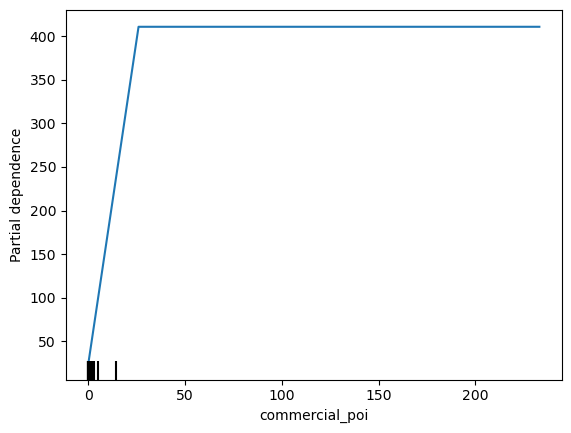

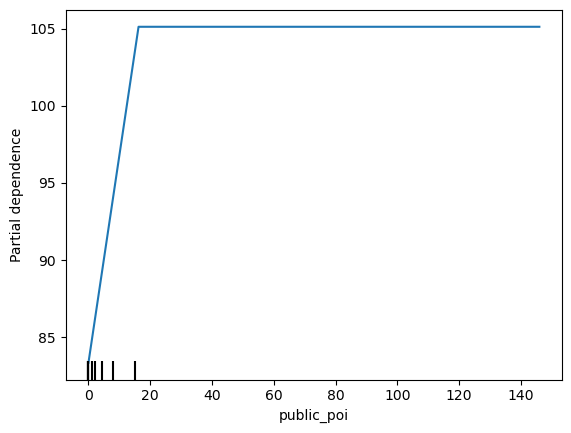

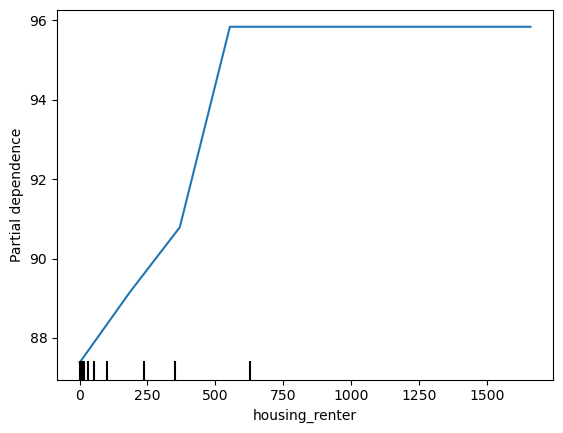

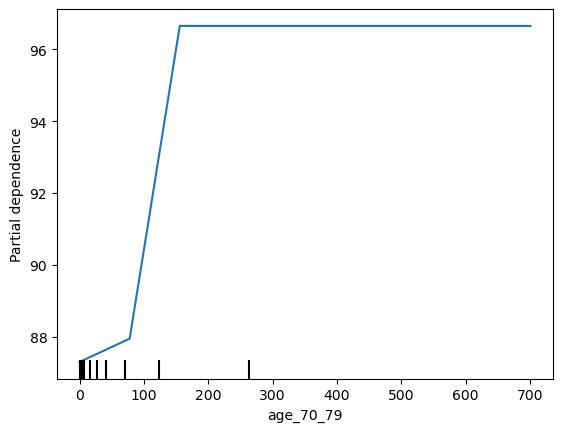

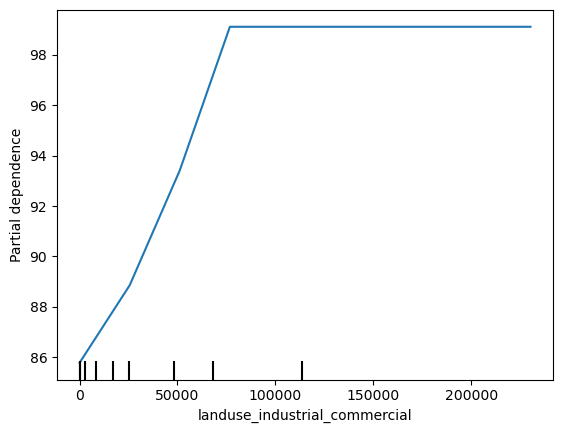

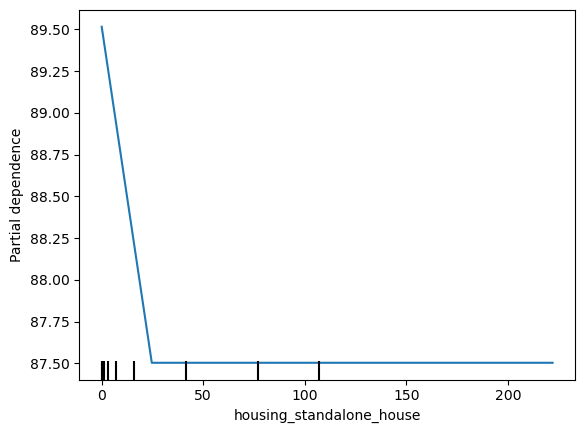

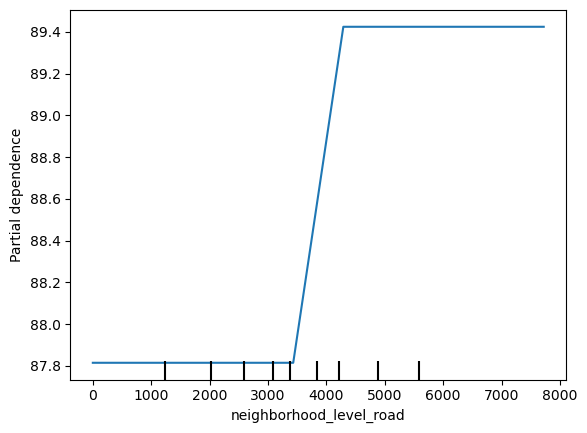

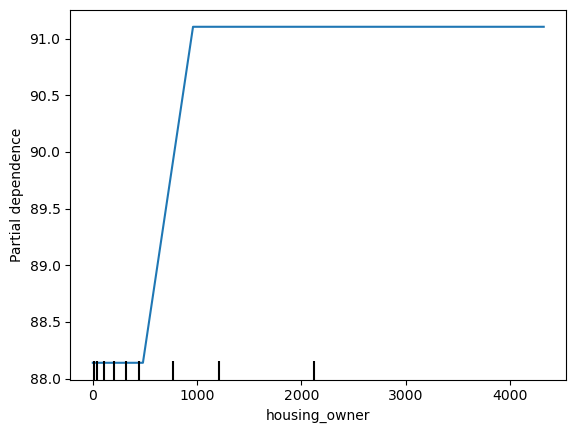

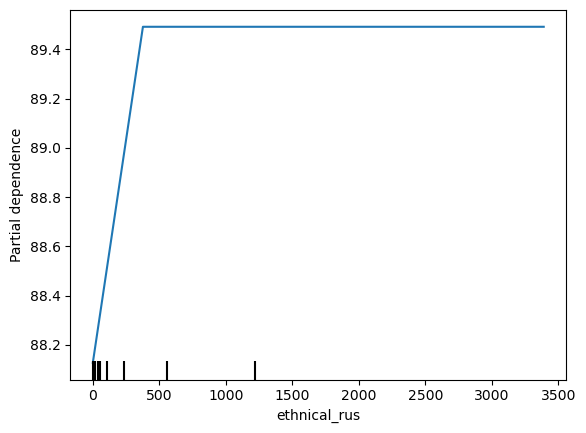

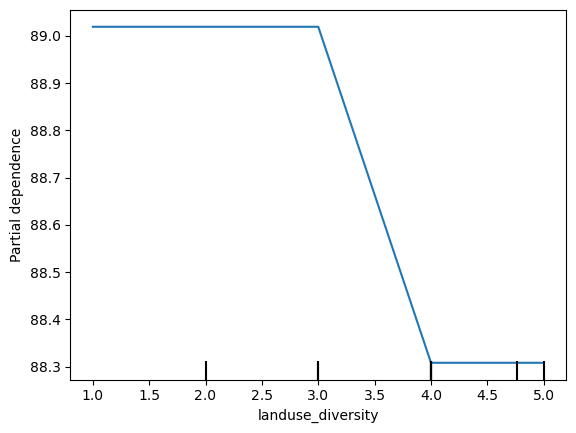

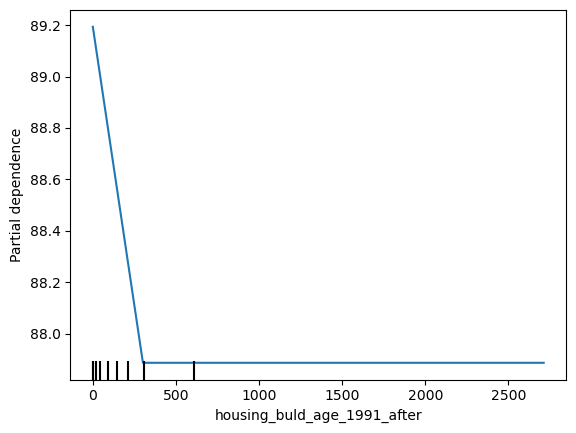

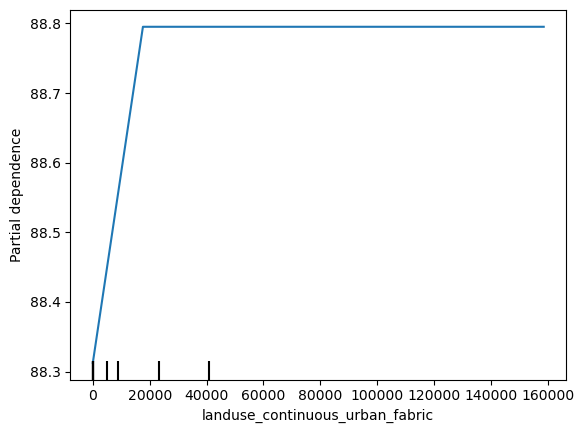

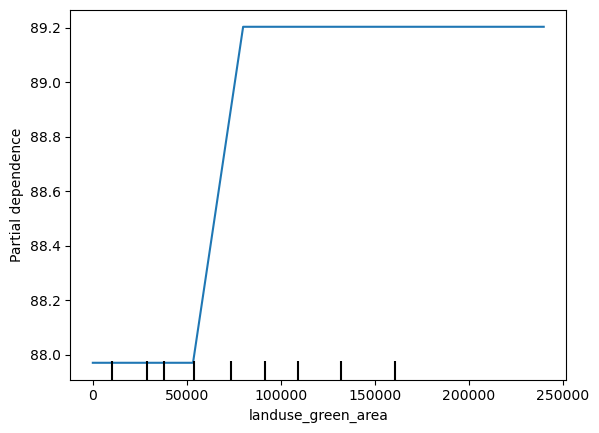

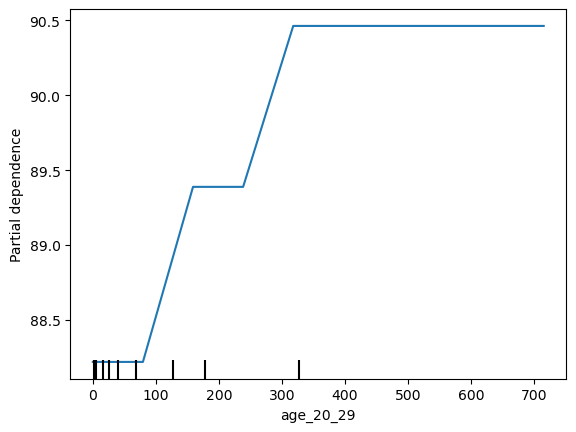

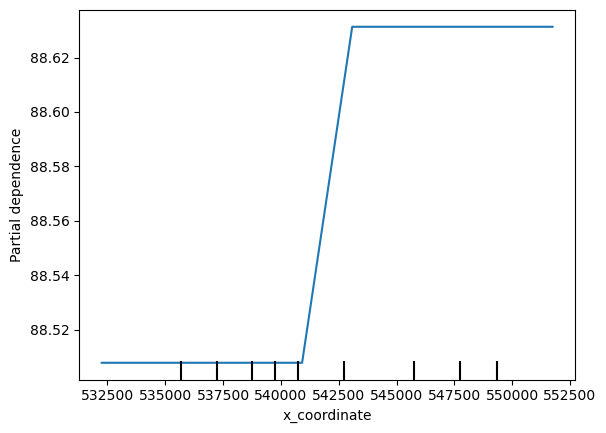

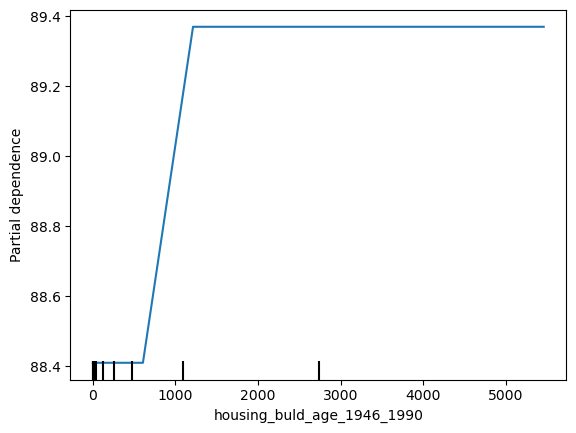

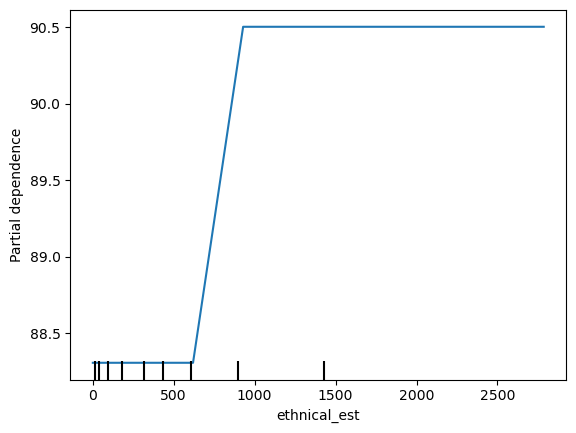

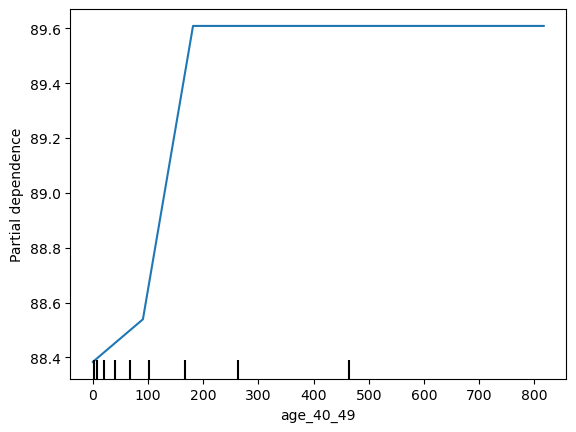

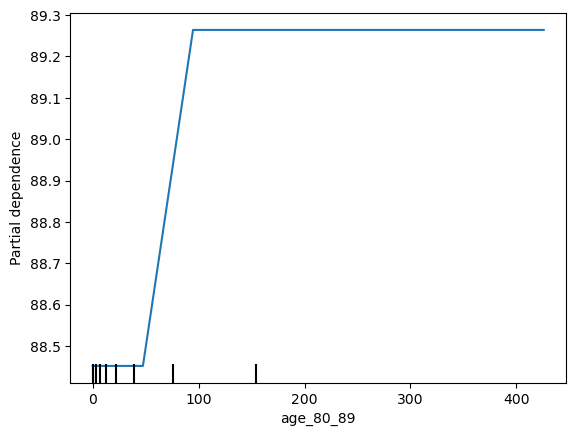

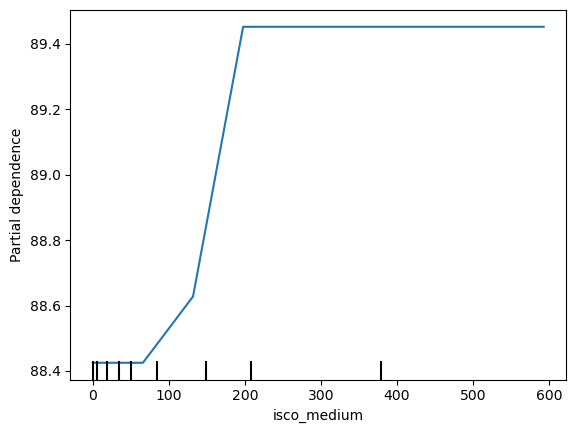

In [138]:
from sklearn.inspection import PartialDependenceDisplay

for pdp in df_forest_importance['Factor']:
    PartialDependenceDisplay.from_estimator(
        reg,
        x_test,
        features=[pdp],
        feature_names=x_columns,
        centered=False,
        kind="average",
        percentiles=(0, 1),
        grid_resolution=10,
    )

## ICE

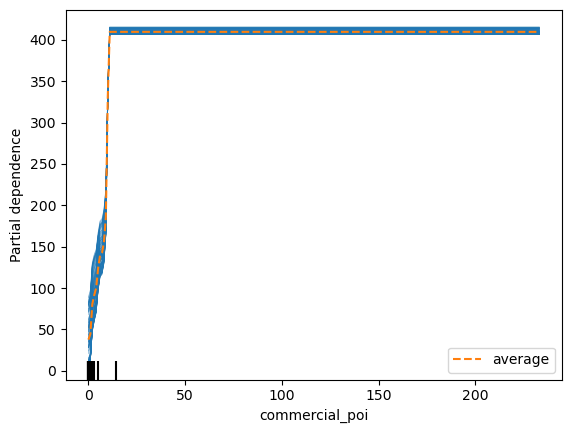

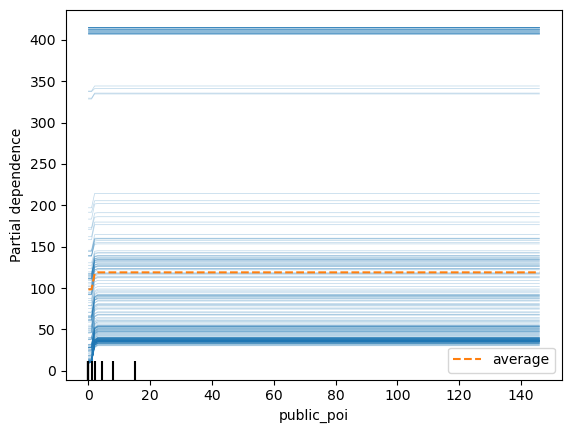

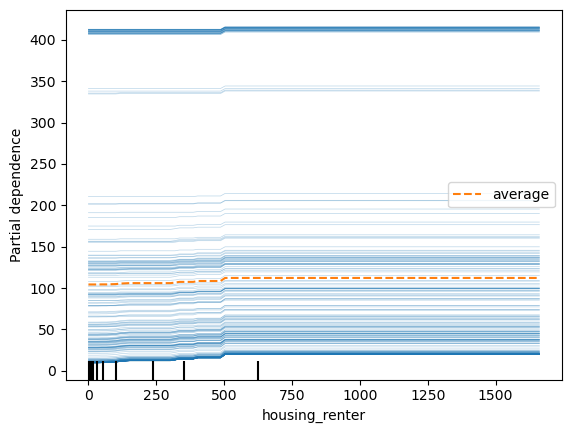

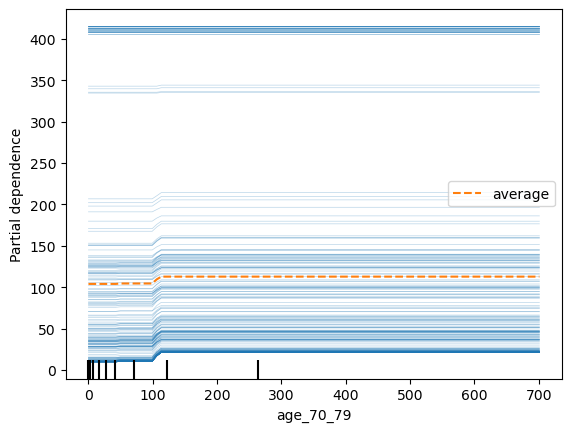

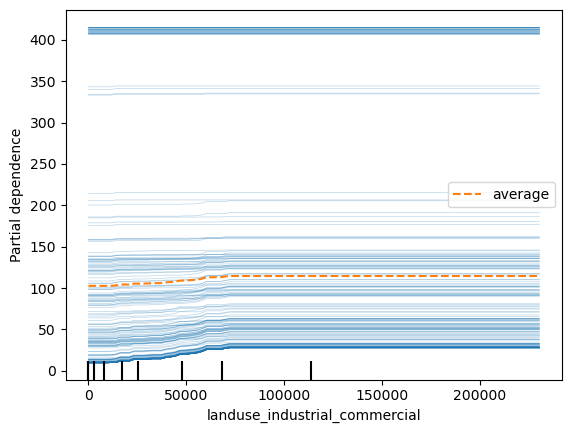

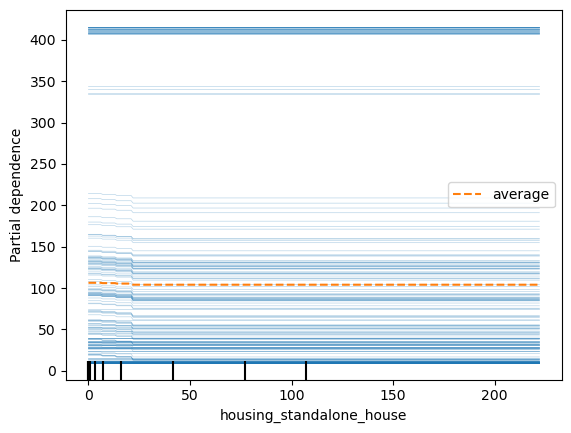

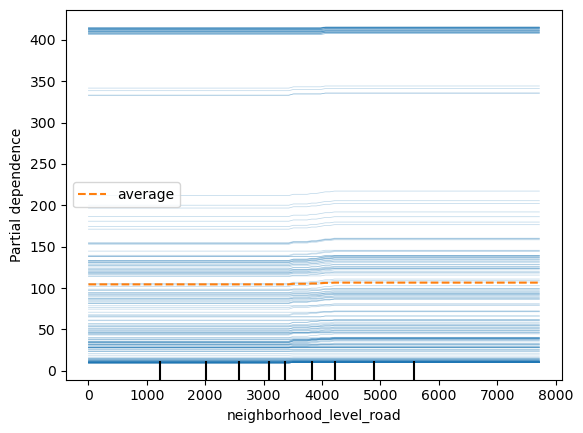

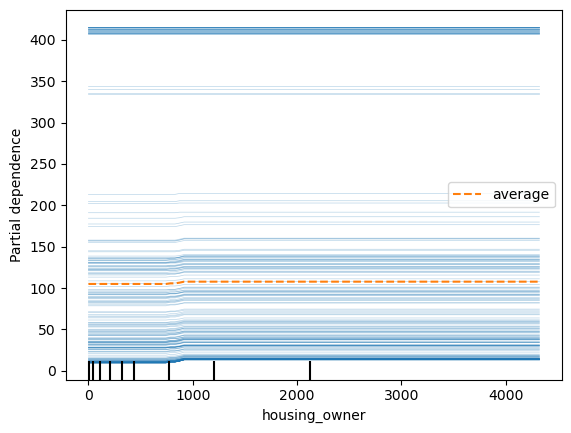

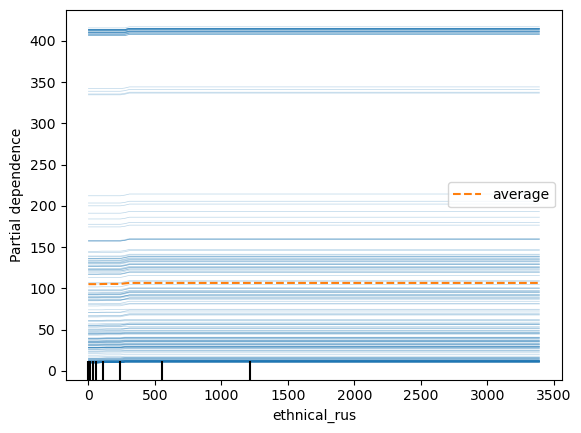

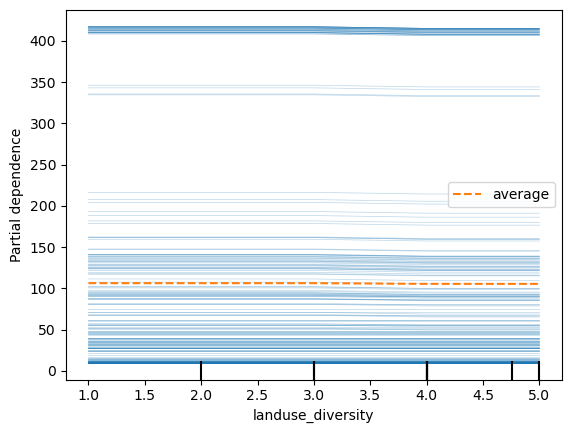

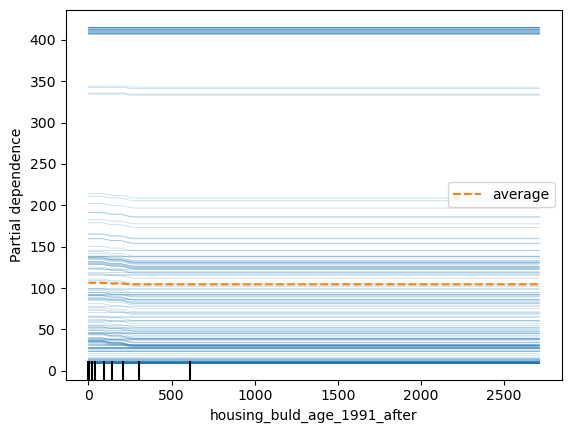

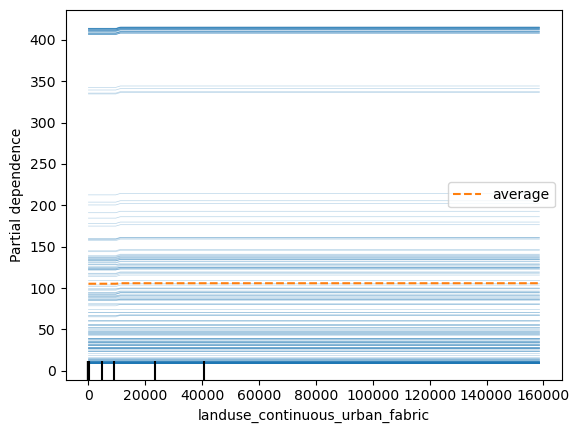

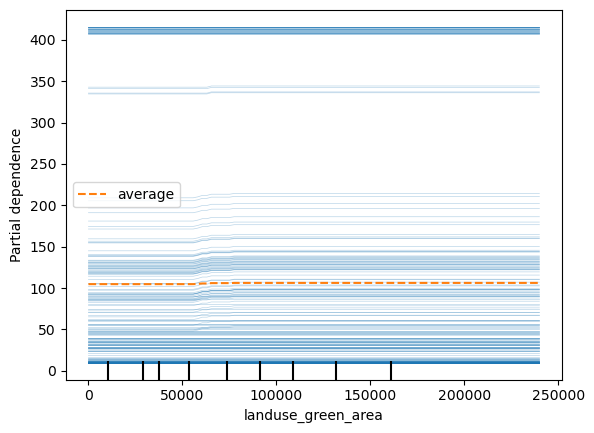

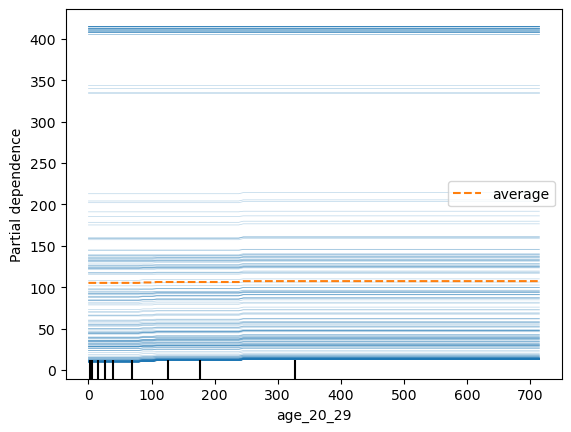

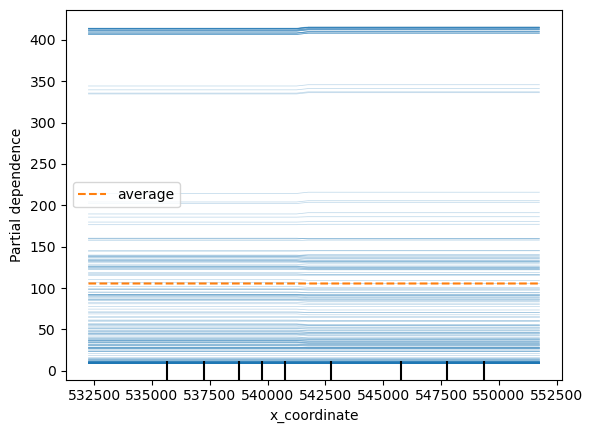

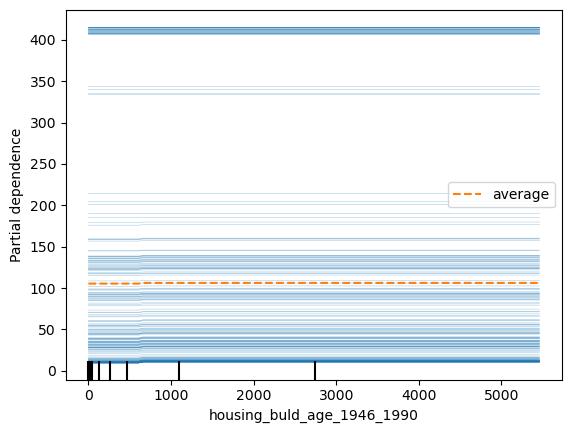

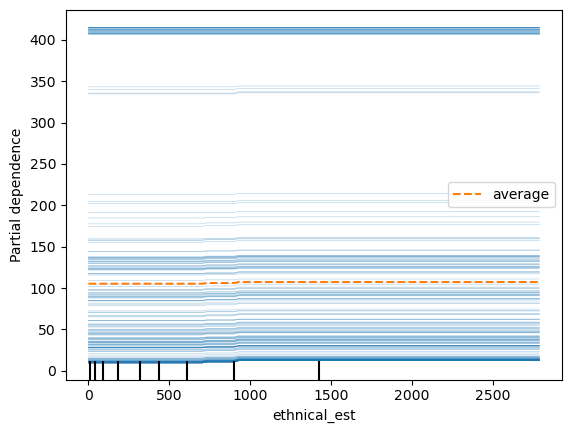

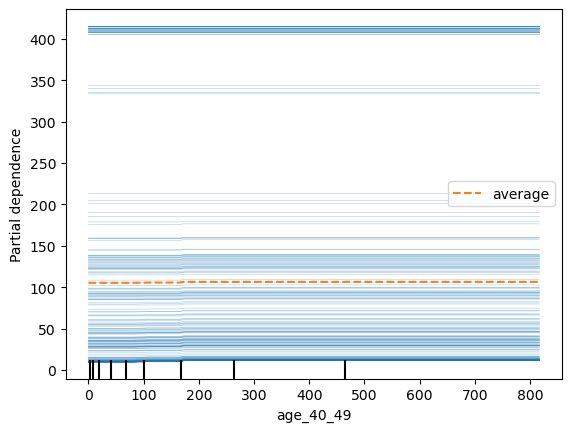

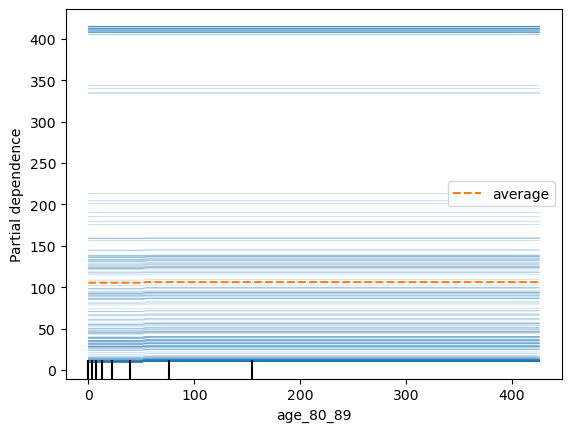

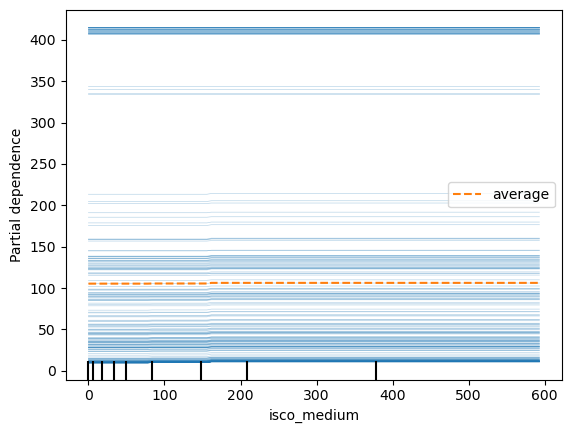

In [139]:
for pdp in df_forest_importance['Factor']:
    PartialDependenceDisplay.from_estimator(
        reg,
        x_test,
        features=[pdp],
        feature_names=x_columns,
        centered=False,
        kind="both",
        percentiles=(0, 1),
        grid_resolution=100,
        
    )